# Classificação de Vidros

Esta base de dados é de origem do Kaggle (disponível em: https://www.kaggle.com/uciml/glass). Este trabalho tem por intuito obter a base de dados do Kaggle, explorar os dados para obter *insights*, analisar e treinar modelos de *Machine Learning* (ML) e verificar se é possível classificar adequadamente os tipos de vidro. Este *Jupyter Notebook* está dividido nos seguintes tópicos:

1. Análise Exploratória dos Dados (EDA)
2. Visualização de Dados
3. Pré processamento
4. Modelo de *Machine Learning*
5. Resultados

### Importando bibliotecas

In [1]:
#data manipulation
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

#set color pallete to pictures
sns.set_palette(palette='YlGnBu')
sns.set_style('darkgrid')

#Reading data
file_path = './data/glass.csv'
df = pd.read_csv(file_path)

## 1. Análise Exploratória dos Dados

Primeiramente vamos olhar para o cabeçário dos dados, isto é, para as primeiras linhas da base de dados. É possível observar que os dados são unicamente numéricos.

In [2]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


A base de dados possui 214 entradas e 10 colunas. Todos os atributos são números flutuantes, a coluna 'Type' é do tipo inteiro e não existem campos vazios, como mostra abaixo *non-null* para todos os atributos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Mostrar as colunas
print('Colunas: {}'.format(df.columns.values))

#Mostrar a quantidade de amostras de cada classe
print('Classes: {}'.format(df['Type'].unique()))

Colunas: ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
Classes: [1 2 3 5 6 7]


A base de dados possui 10 colunas, sendo as 9 primeiras as features e a última o tipo de vidro. Cada feature significa:
* RI - Índice de Fefração
* Na - Sódio (unidade de medida: peso percentual no óxido correspondente, como o restante das features)
* Mg - Magnésio
* Al - Alumínio
* Si -Silício
* K - Potássio
* Ca - Cálcio
* Ba - Bário
* Fe - Ferro

As classes correspondem de 1 a 7 para cada tipo de vidro, tal que:
* 1 - construção de janelas flutuante processado
* 2 - building_windows_non_float_processed 
* 3 - vehicle_windows_float_processed 
* 4 - vehicle_windows_non_float_processed
* 5 - containers 
* 6 - tableware 
* 7 - headlamps

Percebe-se que na saída do código acima, em "Classes", não há o tipo 4. Isto é, não existe amostra para a classe 4.

Agora vamos investigar se, na média, os tipos de vidro possuem diferentes concentrações de elementos. Para isto, veja a tabela a seguir:

In [5]:
df.groupby('Type').mean()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


Descrição geral da base de dados (média, desvio padrão, percentil):

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2. Visualização de Dados

Primeiramente, vamos investigar a quantidade de vidros por tipo:

Text(0, 0.5, 'Quantidade de Amostras')

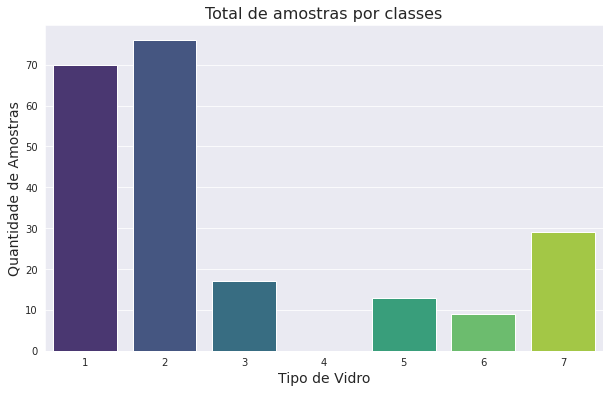

In [7]:
plt.figure(figsize=(10,6))
plt.title('Total de amostras por classes', fontsize=16)
sns.countplot(x='Type',data=df, order=[1,2,3,4,5,6,7],palette='viridis')
plt.xlabel('Tipo de Vidro', fontsize=14)
plt.ylabel('Quantidade de Amostras', fontsize=14)

É perceptível que as classes 1 e 2 possuem mais amostras. Além disso, não existe amostra para a classe 4. Por haver quantidades diferentes de vidro por classe é preciso ter cuidado para modelar e pesar classes desbalanceadas.

Agora queremos investigar se há alguma correlação entre os elementos químicos na composição do vidro. Para isto, foi criada uma matriz de correlação que consiste em calcular em termos percentuais a taxa de correlação linear entre duas variáveis. Para melhor visualização dessa matriz, vamos visualizá-la em um mapa de calor:

<AxesSubplot:>

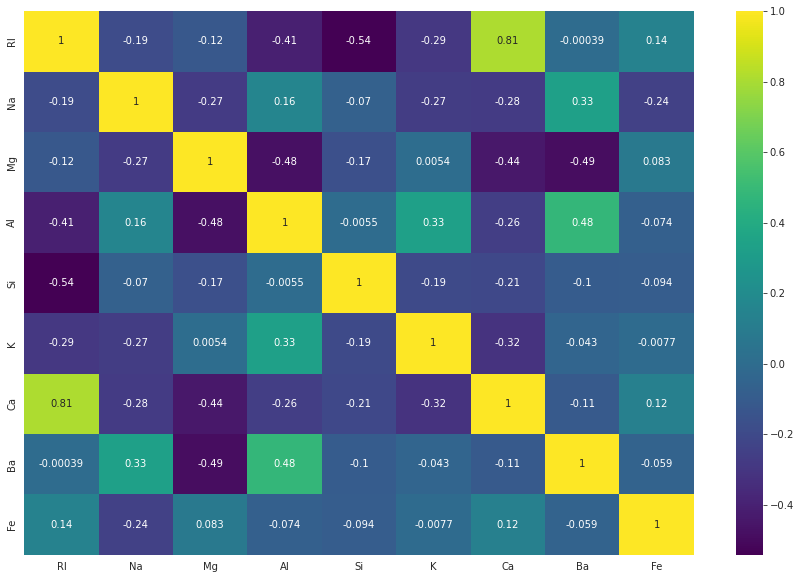

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('Type',axis=1).corr(), annot=True, cmap='viridis')

Pode-se perceber que os elementos mais claros possuem maior correlação, os mais escuros correlação inversa e os intermediários possuem pouca correlação linear. Por exemplo, a maior correlação de atributos são o Índice de Refração (RI) e o elemento Cálcio (Ca) de valor 0.81. Por outro lado, o Índice de Refração (RI) e o Silício (Si) possui o valor mais negativo de -0.51, sugerindo uma correlação inversa.

Vamos olhar mais de perto essas duas correlações citadas:

Text(0.5, 0.98, 'Correlação dos elementos Ca e Si em relação ao RI')

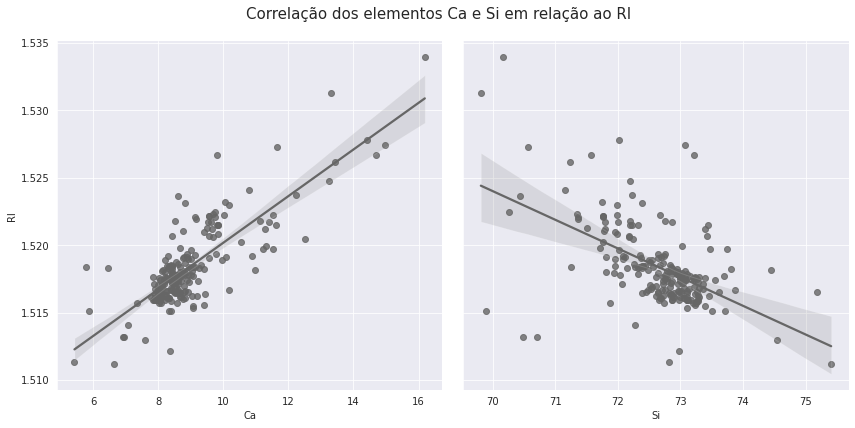

In [9]:
g = sns.PairGrid(df, y_vars=["RI"], x_vars=["Ca", "Si"], height=6, palette='viridis')
g.map(sns.regplot, color=".4")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlação dos elementos Ca e Si em relação ao RI', fontsize=15)

De fato, para o primeiro exemplo entre Ca e RI a tendência linear é de aumento entre as duas variáveis, ao passo que, o segundo exemplo entre Si e RI é de tendência linear negativa entre as duas variáveis.

## 3. Pré processamento

Como vamos trabalhar com alguns algoritmos de ML lineares é preciso que estes dados sejam preprocessados. Para isto vamos utilizar StandScaler para esta tarefa e utilizar o X_scaled para os algoritmos de ML que precisarem mesmo. Para árvores de decisão isto não será necessário.

In [10]:
# Dados originais
X = df.drop(labels='Type',axis=1)
y = df['Type']

# Dados escalados no X_scaled
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## 4. Modelo de Machine Learning

### 4.1 Decision Trees

Primeiro vamos utilizar uma árvore de decisão e avaliar suas características. Como a base de dados é pequena, vamos procurar os melhores parâmetros que generalizem a classificação (queremos evitar o overfitting e underfitting). Para isto, vamos testar a profundidade da árvore e comparar o *score* do treino e do teste.

In [18]:
# Get data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

param_grid = [2, 4, 5, 6, 8]
classifiers = []

for max_depth in param_grid:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=101)
    clf.fit(X_train, y_train)
    print('DecisionTree - max_depth={} | train_score={} | test_score={}'.format(max_depth, \
                                        clf.score(X_train, y_train), clf.score(X_test, y_test)))
    
    classifiers.append(clf)

DecisionTree - max_depth=2 | train_score=0.6241610738255033 | test_score=0.6307692307692307
DecisionTree - max_depth=4 | train_score=0.8053691275167785 | test_score=0.6615384615384615
DecisionTree - max_depth=5 | train_score=0.8523489932885906 | test_score=0.7076923076923077
DecisionTree - max_depth=6 | train_score=0.8993288590604027 | test_score=0.6923076923076923
DecisionTree - max_depth=8 | train_score=0.9865771812080537 | test_score=0.7230769230769231


Temos diferentes *scores* em cada árvore de decisão. Na primeira árvore de profundidade 2 o score no treino e no teste ficou por volta de 62%. No outro extremo, de profundidade 8 o *score* do treino ficou em 98% e o *score* no teste ficou em 72% - um candidado a overfitting.

As árvores de decisão que apresentam melhor *tradeoff* são as de profundidade 5 e 6, por terem bom resultado no *score* e um resultado similar no teste - um bom indício de generalização. Para mais análises, vamos escolher a árvore de profundidade 5.

<AxesSubplot:title={'center':'Importância de variáveis'}>

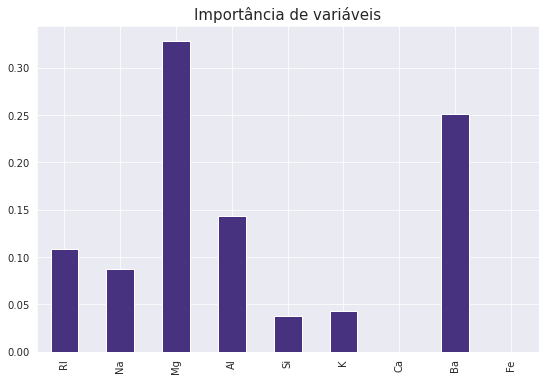

In [12]:
dt = classifiers[2]
df_decisionTree = pd.Series(dt.feature_importances_, index=df.columns.values[0:-1])

plt.figure(figsize=(9,6))
plt.title('Importância de variáveis', fontsize=15)
sns.set_palette('viridis')
df_decisionTree.plot(kind='bar')

In [20]:
dt_predictions = dt.predict(X_test)

### 4.2 Regressão Logística

In [21]:
from sklearn.linear_model import LogisticRegression

#Get data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=101)

#Test parameters
C = [0.01, 0.1, 1.0, 10, 100]
classifiers = []

for c in C:
    clf = LogisticRegression(C=c, random_state=101, n_jobs=-1, max_iter=1000)
    clf.fit(X_scaled, y)
    
    print('Logistic Regression C={} | train_score={} | test_score={}'.format(c, clf.score(X_train, y_train) \
                                                                        ,clf.score(X_test, y_test)))
    
    classifiers.append(clf)

Logistic Regression C=0.01 | train_score=0.6375838926174496 | test_score=0.5692307692307692
Logistic Regression C=0.1 | train_score=0.6778523489932886 | test_score=0.6153846153846154
Logistic Regression C=1.0 | train_score=0.7046979865771812 | test_score=0.676923076923077
Logistic Regression C=10 | train_score=0.7181208053691275 | test_score=0.6923076923076923
Logistic Regression C=100 | train_score=0.7583892617449665 | test_score=0.6615384615384615


In [22]:
#Choose LogisticRegression
lr=classifiers[3]
lr_preditions = lr.predict(X_test)

## 5. Validação

Temos dois modelos em mãos: O que escolher?



In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf1 = classification_report(dt_predictions, y_test)
conf2 = classification_report(lr_preditions, y_test)

/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("Decision Tree Classification Report")
print(conf2)

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.67      0.64      0.65        22
           2       0.70      0.62      0.65        26
           3       0.00      0.00      0.00         0
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.69      0.65      0.67        65
weighted avg       0.75      0.69      0.72        65



In [50]:
print("Logistic Regression Classification Report")
print(conf1)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.67      0.70      0.68        20
           2       0.74      0.68      0.71        25
           3       0.40      0.40      0.40         5
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       0.78      0.88      0.82         8

    accuracy                           0.71        65
   macro avg       0.72      0.73      0.73        65
weighted avg       0.71      0.71      0.71        65



Nos dois modelos acima é notório que ambos classificam razoavelmente bem todas as classes, exceto a classe 3. A classe 3 teve o pior resultado. Logo, este modelo serve bem para as classes 1, 2, 5, 6 e 7. Para classificar bem a classe 3 deveria-se ajustar o modelo para melhorar a acurácia nesta classe específica.